## import module

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.family'] = 'Malgun Gothic'  # (Windows 용) 한글 출력을 위한 글꼴 설정

import os
import sys
import urllib.request

#!pip install pymysql
import pymysql
import logging
import sqlite3

## api request code

### naver api example code

In [ ]:
client_id = "YOUR_CLIENT_ID"
client_secret = "YOUR_CLIENT_SECRET"
url = "https://openapi.naver.com/v1/datalab/search";
body = "{\"startDate\":\"2017-01-01\",\"endDate\":\"2017-04-30\",\"timeUnit\":\"month\",\"keywordGroups\":[{\"groupName\":\"한글\",\"keywords\":[\"한글\",\"korean\"]},{\"groupName\":\"영어\",\"keywords\":[\"영어\",\"english\"]}],\"device\":\"pc\",\"ages\":[\"1\",\"2\"],\"gender\":\"f\"}";

request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
request.add_header("Content-Type","application/json")
response = urllib.request.urlopen(request, data=body.encode("utf-8"))
rescode = response.getcode()
if(rescode==200):
    response_body = response.read()
    print(response_body.decode('utf-8'))
else:
    print("Error Code:" + rescode)

### from naver api to python (crawling)

- 2021-01-01 ~ 2021-05-27
- 네이버쇼핑 패션의류 트렌드
- 내 어플리케이션 : DataEngineeringTest

In [110]:
def get_shop(client_id, client_secret) :
    endpoint = 'https://openapi.naver.com/v1/datalab/shopping/categories'
    bodys = "{\"startDate\":\"2021-01-01\","\
    "\"endDate\":\"2021-05-27\","\
    "\"timeUnit\":\"date\","\
    "\"category\":[{\"name\":\"패션의류\",\"param\":[\"50000000\"]}]}"
    
    requests = urllib.request.Request(endpoint)
    
    requests.add_header('X-Naver-Client-Id', client_id)
    requests.add_header('X-Naver-Client-Secret', client_secret)
    requests.add_header('Content-Type', 'application/json')

    response = urllib.request.urlopen(requests, data=bodys.encode('utf-8'))
    
    try :
        response = urllib.request.urlopen(requests,  data=bodys.encode('utf-8'))
    except :
        logging.error(response.read())
        sys.exit(1)
    response = urllib.request.urlopen(requests,  data=bodys.encode('utf-8'))

    if response.getcode() == 200 :
        response_body = response.read()
        contents = response_body.decode('utf-8')
    else :
        print(response.getcode())
        print(response.read())
        sys.exit(1)
        
    return contents

In [111]:
# 개인정보
host=' '
user=' ' 
passwd=' '
db=' '
client_id = ' '
client_secret= ' '

## from python to mysql

In [123]:
def main() :
    # aws mysql 연결
    try:
        conn=pymysql.connect(host=host, 
                             user=user, 
                             passwd=passwd,
                             db=db,
                            use_unicode=True,
                            charset = 'utf8')
        cursor = conn.cursor()
    except :
        logging.error('could not connect to RDS')
        sys.exit(1)
        
    shops = get_shop(client_id, client_secret)
    
    # json 변환
    raw = json.loads(shops)
    
    # data, ratio 추출
    datas=raw['results'][0]['data']
    
    # db 넣기 전 리스트에 담기
    shop_content=[]
    # column 값 key로 row값 value로 
    for data in datas :
        shop_content.append(
        {
       'dates' : data['period'],
        'ratios' : data['ratio']
        }
        )
    print(shop_content)

In [137]:
shop_content = [{'dates': '2021-01-01', 'ratios': 64.00962}, {'dates': '2021-01-02', 'ratios': 72.16472}, {'dates': '2021-01-03', 'ratios': 79.08133}, {'dates': '2021-01-04', 'ratios': 67.25975}, {'dates': '2021-01-05', 'ratios': 66.39807}, {'dates': '2021-01-06', 'ratios': 67.53876}, {'dates': '2021-01-07', 'ratios': 68.62444}, {'dates': '2021-01-08', 'ratios': 65.21126}, {'dates': '2021-01-09', 'ratios': 73.9993}, {'dates': '2021-01-10', 'ratios': 83.32384}, {'dates': '2021-01-11', 'ratios': 68.64429}, {'dates': '2021-01-12', 'ratios': 66.28357}, {'dates': '2021-01-13', 'ratios': 63.97735}, {'dates': '2021-01-14', 'ratios': 60.16353}, {'dates': '2021-01-15', 'ratios': 54.99308}, {'dates': '2021-01-16', 'ratios': 65.2882}, {'dates': '2021-01-17', 'ratios': 75.1651}, {'dates': '2021-01-18', 'ratios': 64.61665}, {'dates': '2021-01-19', 'ratios': 61.45828}, {'dates': '2021-01-20', 'ratios': 59.49385}, {'dates': '2021-01-21', 'ratios': 57.71921}, {'dates': '2021-01-22', 'ratios': 54.4195}, {'dates': '2021-01-23', 'ratios': 64.17339}, {'dates': '2021-01-24', 'ratios': 72.29285}, {'dates': '2021-01-25', 'ratios': 60.85318}, {'dates': '2021-01-26', 'ratios': 62.88367}, {'dates': '2021-01-27', 'ratios': 60.20973}, {'dates': '2021-01-28', 'ratios': 57.81495}, {'dates': '2021-01-29', 'ratios': 52.18224}, {'dates': '2021-01-30', 'ratios': 61.19151}, {'dates': '2021-01-31', 'ratios': 71.06279}, {'dates': '2021-02-01', 'ratios': 62.67961}, {'dates': '2021-02-02', 'ratios': 60.86329}, {'dates': '2021-02-03', 'ratios': 59.81734}, {'dates': '2021-02-04', 'ratios': 57.21143}, {'dates': '2021-02-05', 'ratios': 52.03423}, {'dates': '2021-02-06', 'ratios': 60.8359}, {'dates': '2021-02-07', 'ratios': 71.95381}, {'dates': '2021-02-08', 'ratios': 57.29833}, {'dates': '2021-02-09', 'ratios': 51.98436}, {'dates': '2021-02-10', 'ratios': 48.36837}, {'dates': '2021-02-11', 'ratios': 53.91451}, {'dates': '2021-02-12', 'ratios': 56.60269}, {'dates': '2021-02-13', 'ratios': 69.00069}, {'dates': '2021-02-14', 'ratios': 85.05192}, {'dates': '2021-02-15', 'ratios': 70.84427}, {'dates': '2021-02-16', 'ratios': 68.16327}, {'dates': '2021-02-17', 'ratios': 65.02936}, {'dates': '2021-02-18', 'ratios': 61.07542}, {'dates': '2021-02-19', 'ratios': 56.61549}, {'dates': '2021-02-20', 'ratios': 69.81834}, {'dates': '2021-02-21', 'ratios': 84.46596}, {'dates': '2021-02-22', 'ratios': 74.05212}, {'dates': '2021-02-23', 'ratios': 68.74574}, {'dates': '2021-02-24', 'ratios': 65.05387}, {'dates': '2021-02-25', 'ratios': 63.49406}, {'dates': '2021-02-26', 'ratios': 58.37357}, {'dates': '2021-02-27', 'ratios': 71.5045}, {'dates': '2021-02-28', 'ratios': 83.11919}, {'dates': '2021-03-01', 'ratios': 92.78354}, {'dates': '2021-03-02', 'ratios': 67.5562}, {'dates': '2021-03-03', 'ratios': 67.30876}, {'dates': '2021-03-04', 'ratios': 69.08397}, {'dates': '2021-03-05', 'ratios': 63.97267}, {'dates': '2021-03-06', 'ratios': 81.17814}, {'dates': '2021-03-07', 'ratios': 96.779}, {'dates': '2021-03-08', 'ratios': 79.26694}, {'dates': '2021-03-09', 'ratios': 77.77782}, {'dates': '2021-03-10', 'ratios': 78.19005}, {'dates': '2021-03-11', 'ratios': 76.58103}, {'dates': '2021-03-12', 'ratios': 71.23601}, {'dates': '2021-03-13', 'ratios': 82.40371}, {'dates': '2021-03-14', 'ratios': 100}, {'dates': '2021-03-15', 'ratios': 84.26063}, {'dates': '2021-03-16', 'ratios': 82.98647}, {'dates': '2021-03-17', 'ratios': 83.07373}, {'dates': '2021-03-18', 'ratios': 78.96596}, {'dates': '2021-03-19', 'ratios': 71.14861}, {'dates': '2021-03-20', 'ratios': 86.42977}, {'dates': '2021-03-21', 'ratios': 97.61617}, {'dates': '2021-03-22', 'ratios': 79.60873}, {'dates': '2021-03-23', 'ratios': 77.87325}, {'dates': '2021-03-24', 'ratios': 76.92274}, {'dates': '2021-03-25', 'ratios': 73.44096}, {'dates': '2021-03-26', 'ratios': 67.46452}, {'dates': '2021-03-27', 'ratios': 82.52625}, {'dates': '2021-03-28', 'ratios': 94.69714}, {'dates': '2021-03-29', 'ratios': 80.33814}, {'dates': '2021-03-30', 'ratios': 79.08446}, {'dates': '2021-03-31', 'ratios': 76.48952}, {'dates': '2021-04-01', 'ratios': 75.07665}, {'dates': '2021-04-02', 'ratios': 68.29759}, {'dates': '2021-04-03', 'ratios': 84.73388}, {'dates': '2021-04-04', 'ratios': 92.63387}, {'dates': '2021-04-05', 'ratios': 77.42428}, {'dates': '2021-04-06', 'ratios': 76.75849}, {'dates': '2021-04-07', 'ratios': 75.94983}, {'dates': '2021-04-08', 'ratios': 71.27968}, {'dates': '2021-04-09', 'ratios': 64.40717}, {'dates': '2021-04-10', 'ratios': 73.26077}, {'dates': '2021-04-11', 'ratios': 86.32427}, {'dates': '2021-04-12', 'ratios': 74.8295}, {'dates': '2021-04-13', 'ratios': 69.57797}, {'dates': '2021-04-14', 'ratios': 66.86609}, {'dates': '2021-04-15', 'ratios': 64.24717}, {'dates': '2021-04-16', 'ratios': 61.28991}, {'dates': '2021-04-17', 'ratios': 68.71784}, {'dates': '2021-04-18', 'ratios': 78.51503}, {'dates': '2021-04-19', 'ratios': 70.72447}, {'dates': '2021-04-20', 'ratios': 75.41158}, {'dates': '2021-04-21', 'ratios': 78.14212}, {'dates': '2021-04-22', 'ratios': 75.63091}, {'dates': '2021-04-23', 'ratios': 67.8903}, {'dates': '2021-04-24', 'ratios': 77.15489}, {'dates': '2021-04-25', 'ratios': 90.95602}, {'dates': '2021-04-26', 'ratios': 77.64161}, {'dates': '2021-04-27', 'ratios': 74.6249}, {'dates': '2021-04-28', 'ratios': 73.85298}, {'dates': '2021-04-29', 'ratios': 70.70014}, {'dates': '2021-04-30', 'ratios': 62.3357}, {'dates': '2021-05-01', 'ratios': 74.15629}, {'dates': '2021-05-02', 'ratios': 81.17016}, {'dates': '2021-05-03', 'ratios': 69.70448}, {'dates': '2021-05-04', 'ratios': 65.91674}, {'dates': '2021-05-05', 'ratios': 78.22617}, {'dates': '2021-05-06', 'ratios': 70.29125}, {'dates': '2021-05-07', 'ratios': 63.84672}, {'dates': '2021-05-08', 'ratios': 71.15384}, {'dates': '2021-05-09', 'ratios': 83.17703}, {'dates': '2021-05-10', 'ratios': 75.24872}, {'dates': '2021-05-11', 'ratios': 74.26278}, {'dates': '2021-05-12', 'ratios': 76.17889}, {'dates': '2021-05-13', 'ratios': 76.84353}, {'dates': '2021-05-14', 'ratios': 73.3503}, {'dates': '2021-05-15', 'ratios': 82.71352}, {'dates': '2021-05-16', 'ratios': 95.66817}, {'dates': '2021-05-17', 'ratios': 77.45015}, {'dates': '2021-05-18', 'ratios': 72.87718}, {'dates': '2021-05-19', 'ratios': 85.78775}, {'dates': '2021-05-20', 'ratios': 75.75368}, {'dates': '2021-05-21', 'ratios': 66.12294}, {'dates': '2021-05-22', 'ratios': 75.2396}, {'dates': '2021-05-23', 'ratios': 85.57664}, {'dates': '2021-05-24', 'ratios': 75.21978}, {'dates': '2021-05-25', 'ratios': 73.43508}, {'dates': '2021-05-26', 'ratios': 72.81719}, {'dates': '2021-05-27', 'ratios': 68.57971}]

In [140]:
len(shop_content)

147

In [142]:
conn=pymysql.connect(host=host, 
                             user=user, 
                             passwd=passwd,
                             db=db,
                            use_unicode=True,
                            charset = 'utf8')
cursor = conn.cursor()
for content in shop_content :
    sql = "insert into shop_21(dates,ratio) values(%(dates)s, %(ratios)s);"
    cursor.execute(sql, content)
conn.commit()
conn.close()

## from mysql to dataframe

In [2]:
host=' '
user=' ' 
passwd=' '
db=' '
client_id = ' '
client_secret= ' '

In [3]:
def get_data(host, user, db, passwd):
    try:
        conn=pymysql.connect(host=host, 
                             user=user, 
                             passwd=passwd,
                             db=db,
                            use_unicode=True,
                            charset = 'utf8',
                            cursorclass=pymysql.cursors.DictCursor)
        cursor = conn.cursor()
    except :
        logging.error('could not connect to AWS RDS mysql.')
        sys.exit(1)
    cursor.execute('select * from shop_21')
    result = cursor.fetchall()
    conn.close()
    
    df = pd.DataFrame(result)
    return df

In [14]:
df_shopping_trend= get_data(host=host,
user=user, 
passwd=passwd,
db=db)
df_shopping_trend

,dates,ratio
0,2021-01-01,64
1,2021-01-02,72
2,2021-01-03,79
3,2021-01-04,67
4,2021-01-05,66
...,...,...
142,2021-05-23,86
143,2021-05-24,75
144,2021-05-25,73
145,2021-05-26,73


In [15]:
df_shopping_trend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   dates   147 non-null    datetime64[ns]
 1   ratio   147 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


Text(0.5, 1.0, 'naver shopping 패션의류 trend')

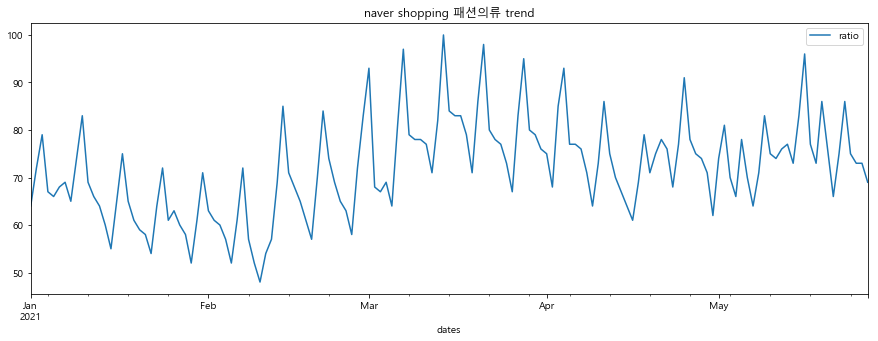

In [16]:
df_shopping_trend.plot.line(x='dates', y='ratio', figsize=(15,5))
plt.title('naver shopping 패션의류 trend')